---
# Apresentação:
---

> Este Código foi desenvolvido em Python no Google Colaboratory e seu funcionamento está a ele relacionado.

> **Para um melhor acompanhamento**, [visualize através do Colab](https://colab.research.google.com/drive/1D-ClHjGMcoZyO76BXasFtt0NG3rr9Wb7?usp=sharing) utilizando os índices.



@author: GustavoDasa

---
# Bibliotecas
---

In [ ]:
# Matemática
import math
import numpy as np
import random as rd

# Dados e Gráficos
import matplotlib.pyplot as plt
import matplotlib as mpl

# Estatística
from scipy import stats
import seaborn as sns
import pandas as pd

# Interações
from ipywidgets import interact, interactive, fixed, interact_manual, Button, Layout
import ipywidgets as widgets
from IPython.display import display, Latex , HTML

# GIF
from google.colab import files
import glob
from PIL import Image


mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['font.serif'] = 'Tahoma'
mpl.rcParams['svg.fonttype'] = 'none'
mpl.rcParams['figure.dpi'] = 300

In [ ]:
# @title Função Cria_GIF

def Cria_GIF(func, quadros, remove=True, duracao=100):
    '''
    Gerador de GIF a partir de imagens contidas no diretório, de modo numérico sequencial.
    Params:
    quadros = <quantidade de iterações>, remove= <True para remover imagens após geração>, duracao= <tempo em milisegundos>
    '''

    ###     Gera Imagens
    for i in range(1,quadros):
        alph=round(i/400,3)
        func(alph)

    frames = [Image.open(str(image)+'.png') for image in range(1,quadros)]
    frame_one = frames[0]
    frame_one.save("my_awesome.gif", format="GIF", append_images=frames,
                save_all=True, duration=duracao, loop=0)

    files.download("my_awesome.gif")

    ###     Remove imagens
    if remove:
        for i in range(1,quadros):
            !rm /content/{i}.png

---
# Poder do Teste (Hipóteses Simples):

O poder do teste com região crítica $R_c$ para testar $H_0 : \theta = \theta_0  \times H_1 : \theta = \theta_1$ será:

\
$$P(Rejeitar \space H_0|H_1 \space é \space verdadeira) = 1-\beta$$

\
Onde quanto maior o poder, melhor o teste. Portanto:

\
$$\pi(\theta_1) = P(\boldsymbol{X} \in R_c | \theta_1) $$

---
# Função Poder:


É a probabilidade de rejeitar $H_0$ quando a distribuição da qual foram obtido os dados foi parametrizado por $\theta$, $\theta \in \Theta$  :

\
$$\pi(\theta) = P(Rejeitar \space H_0)$$

In [ ]:
# @title Gráfico {display-mode: 'form'}

dist = widgets.FloatSlider(value=0, description='Distância', max=10, min=0,step=0.5)
alph = widgets.FloatSlider(value=0.05, description='α', max=.99, min=.01 , step=0.01)
n = widgets.IntSlider(value=16, description='n', max=100, min=1)
std = widgets.IntSlider(value=6, description='σ', max=50, min=1)

prop1 = widgets.Checkbox(value=True,    description='Proporção Gráfico Normal',    disabled=False,    indent=True)
prop2 = widgets.Checkbox(value=True,    description='Proporção Gráfico Poder',    disabled=False,    indent=True)
rangex = widgets.IntSlider(value=6, description='Range', max=50, min=1)
altura = widgets.FloatSlider(value=.5, description='Altura', max=1, min=0)

ui = widgets.HBox([dist,alph,n,std])
ue = widgets.HBox([prop1,prop2,rangex,altura])

def h(dist,alph,n,std,prop1,prop2,rangex,altura):

    prop=(n**.5)/std
    c1='#35a4bd'
    c2='#8e43ba'
    mu1=150
    var=std**2
    mu2=mu1+dist
    alt = -0.02*prop


    x = stats.norm.ppf(1-alph,loc=mu1 ,scale=std/(n**.5))
    beta = round(stats.norm.cdf(x, loc=mu2 , scale=std/(n**.5)) , 2)
    b=stats.norm.ppf(1-beta,loc=mu2,scale=std/(n**.5))
    a=stats.norm.ppf(alph,loc=mu1,scale=std/(n**.5))

    plt.figure(figsize=(12,5) , facecolor='#ebebeb')
    plt.subplot(1,2,1)
    plt.title(r'Distribuição $Normal(\mu , %s)$ - Amostra de tamanho %%s' %var %n)

    if prop1:
        lim1 = stats.norm.ppf([.0001,.9999],loc=mu1, scale = std/(n**.5))
        # X = np.arange(mu1-(5/prop),mu1+(5/prop),0.01/prop)
        X = np.arange(lim1[0],lim1[1],0.01/prop)
    else:
        X = np.arange(-rangex,rangex,0.01/prop)
        plt.ylim([-0.05*prop,altura])

    C = stats.norm.pdf(0,scale=std/(n**.5))

    plt.plot([mu1]*2,[alt,C] ,':', color='k',alpha=0.2)
    plt.plot([mu1+dist]*2,[alt,C] ,':', color='k',alpha=0.2)
    plt.scatter(mu1,alt,marker='X',lw=0.25,color=c1 , label=r'$H_{_0}: \mu_1$ = %s' %float(mu1))
    plt.scatter(mu2,alt,marker='X',lw=.25,color=c2 , label=r'$H_{_1}: \mu_2$ = %s' %mu2)

    plt.plot([x,x],[alt,stats.norm.pdf(x,loc=mu1,scale=std/(n**.5))] ,'--', color='k',alpha=0.5, label=r'$\bar{x}_c = %s$' %round(x,2))

    plt.plot(X,stats.norm.pdf(X ,loc=mu1 ,scale=std/(n**.5)) , color=c1 , alpha=.8,lw=1.5)
    plt.fill_between(X,stats.norm.pdf(X,loc=mu1, scale=std/(n**.5)) ,color=c1,lw=1, alpha=0.2,where=(X>=x),label=r'$\alpha$ = %s' %alph )
    plt.plot(x,stats.norm.pdf(x,loc=mu1, scale=std/(n**.5)),'o',lw=0.25,color=c1,markerfacecolor='white')

    plt.plot(X+dist,stats.norm.pdf(X+dist,loc=mu2 , scale=std/(n**.5)) , color=c2 , alpha=.8,lw=1.5 )
    plt.fill_between(X+dist,stats.norm.pdf(X+dist, loc=mu2 , scale=std/(n**.5)),lw=0 ,color=c2, alpha=0.4,where=(X+dist<x),label=r'$\beta$ = %s' %beta )
    plt.fill_between(X+dist,stats.norm.pdf(X+dist, loc=mu2 , scale=std/(n**.5)) ,color=c2,facecolor='none',hatch='/',lw=0, alpha=0.7,where=(X+dist>x))
    plt.plot(x,stats.norm.pdf(x,loc=mu2, scale=std/(n**.5)),'o',color=c2,markerfacecolor='white')

    plt.legend(facecolor='w')



    #   PLOT 2 --------------------------------------------------------------
    plt.subplot(1,2,2)

    if prop2:
        lim2 = stats.norm.ppf([.01,.99],loc=2*mu1-a,scale=std/(n**.5))
        X = np.arange(lim2[0]-  1,lim2[1]+1,0.01/prop)
    else:
        X = np.arange(3-rangex,5+rangex,0.01/prop)

    plt.title(r'Função Poder - $\pi(\mu)$')

    plt.plot(X,stats.norm.cdf(X,loc=2*mu1-a,scale=std/(n**.5)) , color='#851818' , alpha=.8 , lw=2 )
    plt.plot(mu1+dist,stats.norm.cdf(mu1+dist,loc=2*mu1-a,scale=std/(n**.5)),color='#851818',marker='o',markersize=9,markerfacecolor='white' ,label=r'$\pi(%s)$ = %%s' %mu2 %round(1-beta ,4))

    plt.legend(facecolor='w')
    plt.tight_layout()
    plt.show()




out = widgets.interactive_output(h, {'dist':dist,'alph':alph,'n':n, 'std':std, 'prop1':prop1 , 'prop2':prop2, 'rangex':rangex, 'altura': altura})
display(ui, ue, out)

Output()

# Outros

In [ ]:
# @title Gerador de GIF

###     Gerando Imagens

Quadros=3  # @param {type: "slider", min: 2, max: 200}
prop1 = prop2 = True
dist=7  # @param {type: "slider", min: 0, max: 200}
altura=0.13
rangex=12 # @param {type: "number"}
n=22 # @param {type: "number"}
std=19 # @param {type: "number"}


for i in range(1,Quadros):
    prop=(n**.5)/std
    c1='#35a4bd'
    c2='#8e43ba'
    mu1=0
    var=std**2
    mu2=mu1+dist
    alt = -0.02*prop

    alph=round(i/100,2)


    x = stats.norm.ppf(1-alph,loc=mu1 ,scale=std/(n**.5))+mu1
    beta = round(stats.norm.cdf(x, loc=mu2 , scale=std/(n**.5)) , 2)
    b=stats.norm.ppf(1-beta,loc=mu2,scale=std/(n**.5))
    a=stats.norm.ppf(alph,loc=mu1,scale=std/(n**.5))


    plt.figure(figsize=(13,6))
    plt.subplot(1,2,1)
    plt.title(r'Distribuição $Normal(\mu , %s)$ - Amostra de tamanho %%s' %var %n)

    if prop1:
        lim1 = stats.norm.ppf([.0001,.9999], scale = std/(n**.5))
        # X = np.arange(mu1-(5/prop),mu1+(5/prop),0.01/prop)
        X = np.arange(lim1[0],lim1[1],0.01/prop)
    else:
        X = np.arange(-rangex,rangex,0.01/prop)
        plt.ylim([-0.05*prop,altura])

    C = stats.norm.pdf(0,scale=std/(n**.5))

    plt.plot([0,0],[alt,C] ,':', color='k',alpha=0.2)
    plt.plot([dist,dist],[alt,C] ,':', color='k',alpha=0.2)
    plt.scatter(mu1,alt,marker='X',lw=0.25,color=c1 , label=r'$H_{_0}: \mu_1$ = 0.0')
    plt.scatter(mu2,alt,marker='X',lw=.25,color=c2 , label=r'$H_{_1}: \mu_2$ = %s' %mu2)

    plt.plot([x,x],[alt,stats.norm.pdf(x,scale=std/(n**.5))] ,'--', color='k',alpha=0.5, label=r'$\bar{x}_c = %s$' %round(x,2))

    plt.plot(X,stats.norm.pdf(X ,loc=mu1 ,scale=std/(n**.5)) , color=c1 , alpha=.8,lw=1.5)
    plt.fill_between(X,stats.norm.pdf(X,loc=mu1, scale=std/(n**.5)) ,color=c1,lw=1, alpha=0.2,where=(X>=x),label=r'$\alpha$ = %s' %alph )
    plt.plot(x,stats.norm.pdf(x,loc=mu1, scale=std/(n**.5)),'o',lw=0.25,color=c1,markerfacecolor='white')

    plt.plot(X+dist,stats.norm.pdf(X+dist,loc=mu2 , scale=std/(n**.5)) , color=c2 , alpha=.8,lw=1.5 )
    plt.fill_between(X+dist,stats.norm.pdf(X+dist, loc=mu2 , scale=std/(n**.5)),lw=0 ,color=c2, alpha=0.4,where=(X+dist<x),label=r'$\beta$ = %s' %beta )
    plt.fill_between(X+dist,stats.norm.pdf(X+dist, loc=mu2 , scale=std/(n**.5)) ,color=c2,facecolor='none',hatch='/',lw=0, alpha=0.7,where=(X+dist>x))
    plt.plot(x,stats.norm.pdf(x,loc=mu2, scale=std/(n**.5)),'o',color=c2,markerfacecolor='white')




    plt.legend(shadow=True)


    #   PLOT 2 --------------------------------------------------------------
    plt.subplot(1,2,2)

    if prop2:
        lim2 = stats.norm.ppf([.01,.99],loc=mu1-a,scale=std/(n**.5))
        X = np.arange(lim2[0]-  1,lim2[1]+1,0.01/prop)
    else:
        X = np.arange(3-rangex,5+rangex,0.01/prop)

    plt.title(r'Função Poder - $\pi(\mu)$')

    plt.plot(X,stats.norm.cdf(X,loc=mu1-a,scale=std/(n**.5)) , color='#851818' , alpha=.8 , lw=2 )
    plt.plot(b-b+dist,stats.norm.cdf(b-b,loc=mu2-b,scale=std/(n**.5)),color='#851818',marker='o',markersize=9,markerfacecolor='white' ,label=r'$\pi(%s)$ = %%s' %mu2 %round(1-beta ,4))

    plt.legend()
    plt.tight_layout()

    plt.savefig(f'{i}.png',dpi=100)
    plt.close()



###     Gerando GIF

frames = [Image.open(str(image)+'.png') for image in range(1,Quadros)]
frame_one = frames[0]
frame_one.save("my-.gif", format="GIF", append_images=frames,
            save_all=True, duration=100, loop=0)

files.download("my.gif")

# ###     Remover arquivos
# for i in range(1,Quadros):
#     !rm /content/{i}.png

In [ ]:
# @title Gráfico2 e GIF {display-mode: 'form'}


def h(alph,dist=-10,n=25,std=20,prop1=True,prop2=True,rangex=6,altura=0.5):
    prop=(n**.5)/std
    c1='#636363'
    c2='#35a4bd'
    mu1=155
    var=std**2
    std2=12
    mu2=mu1+dist
    alt = -0.04*prop


    x = stats.norm.ppf(alph,loc=mu1 ,scale=std/(n**.5))
    beta = round(1-stats.norm.cdf(x, loc=mu2 , scale=std2/(n**.5)) , 4)
    b=stats.norm.ppf(beta,loc=mu2,scale=std2/(n**.5))
    a=stats.norm.ppf(alph,loc=mu1,scale=std/(n**.5))

    plt.figure(figsize=(12,5) , facecolor='#e5e5e5')

    if prop1:
        lim1 = stats.norm.ppf([.0001,.9999],loc=mu1, scale = std/(n**.5))
        # X = np.arange(mu1-(5/prop),mu1+(5/prop),0.01/prop)
        X = np.arange(lim1[0],lim1[1],0.01/prop)
    else:
        X = np.arange(-rangex,rangex,0.001/prop)
        plt.ylim([-0.05*prop,altura])

    C = stats.norm.pdf(0,scale=std/(n**.5))
    C2 = stats.norm.pdf(0,scale=std2/(n**.5))

    plt.plot([mu1]*2,[alt,C] ,':', color='k',alpha=0.2)
    plt.plot([mu2]*2,[alt,C2] ,':', color=c2,alpha=0.5)
    plt.scatter(mu1,alt,marker='X',lw=0.25,color=c1 , label=r'$H_{_0}: \mu_1$ = %s' %float(mu1))
    plt.scatter(mu2,alt,marker='X',lw=.25,color=c2 , label=r'$H_{_1}: \mu_2$ = %s' %mu2)

    plt.plot([x,x],[alt,stats.norm.pdf(x,loc=mu1,scale=std/(n**.5))] ,'--', color='k',alpha=0.7, label=r'$\bar{x}_c = %s$' %round(x,2))

    plt.plot(X,stats.norm.pdf(X ,loc=mu1 ,scale=std/(n**.5)) , color=c1 , alpha=.8,lw=1.5)
    plt.fill_between(X,stats.norm.pdf(X,loc=mu1, scale=std/(n**.5)) ,color=c1,lw=1, alpha=0.2,where=(X<=x),label=r'$\alpha$ = %s' %alph )
    plt.plot(x,stats.norm.pdf(x,loc=mu1, scale=std/(n**.5)),'o',lw=0.25,color=c1,markerfacecolor='white')

    plt.plot(X+dist,stats.norm.pdf(X+dist,loc=mu2 , scale=std2/(n**.5)) , color=c2 , alpha=.8,lw=1.5 )
    plt.fill_between(X+dist,stats.norm.pdf(X+dist, loc=mu2 , scale=std2/(n**.5)),lw=0 ,color=c2, alpha=0.4,where=(X+dist>x),label=r'$\beta$ = %s' %beta )
    # plt.fill_between(X+dist,stats.norm.pdf(X+dist, loc=mu2 , scale=std2/(n**.5)) ,color=c2,facecolor='none',hatch='/',lw=0, alpha=0.7,where=(X+dist<=x))
    plt.plot(x,stats.norm.pdf(x,loc=mu2, scale=std2/(n**.5)),'o',color=c2,markerfacecolor='white')



    ax = plt.gca()
    ax.set_facecolor('#e5e5e5')

    plt.yticks([])
    plt.legend()

    plt.tight_layout()


    plt.savefig(f'{i}.png',dpi=100)
    plt.close()

Cria_GIF(h, 81)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
amostras = 200
n=20

medias = []
geral = []
for i in range(amostras):
    k = np.random.normal(10,1,n)
    geral.append( k )
    medias.append( np.mean(k) )

K = pd.DataFrame({ i:geral[i] for i in range(len(geral)) }).T

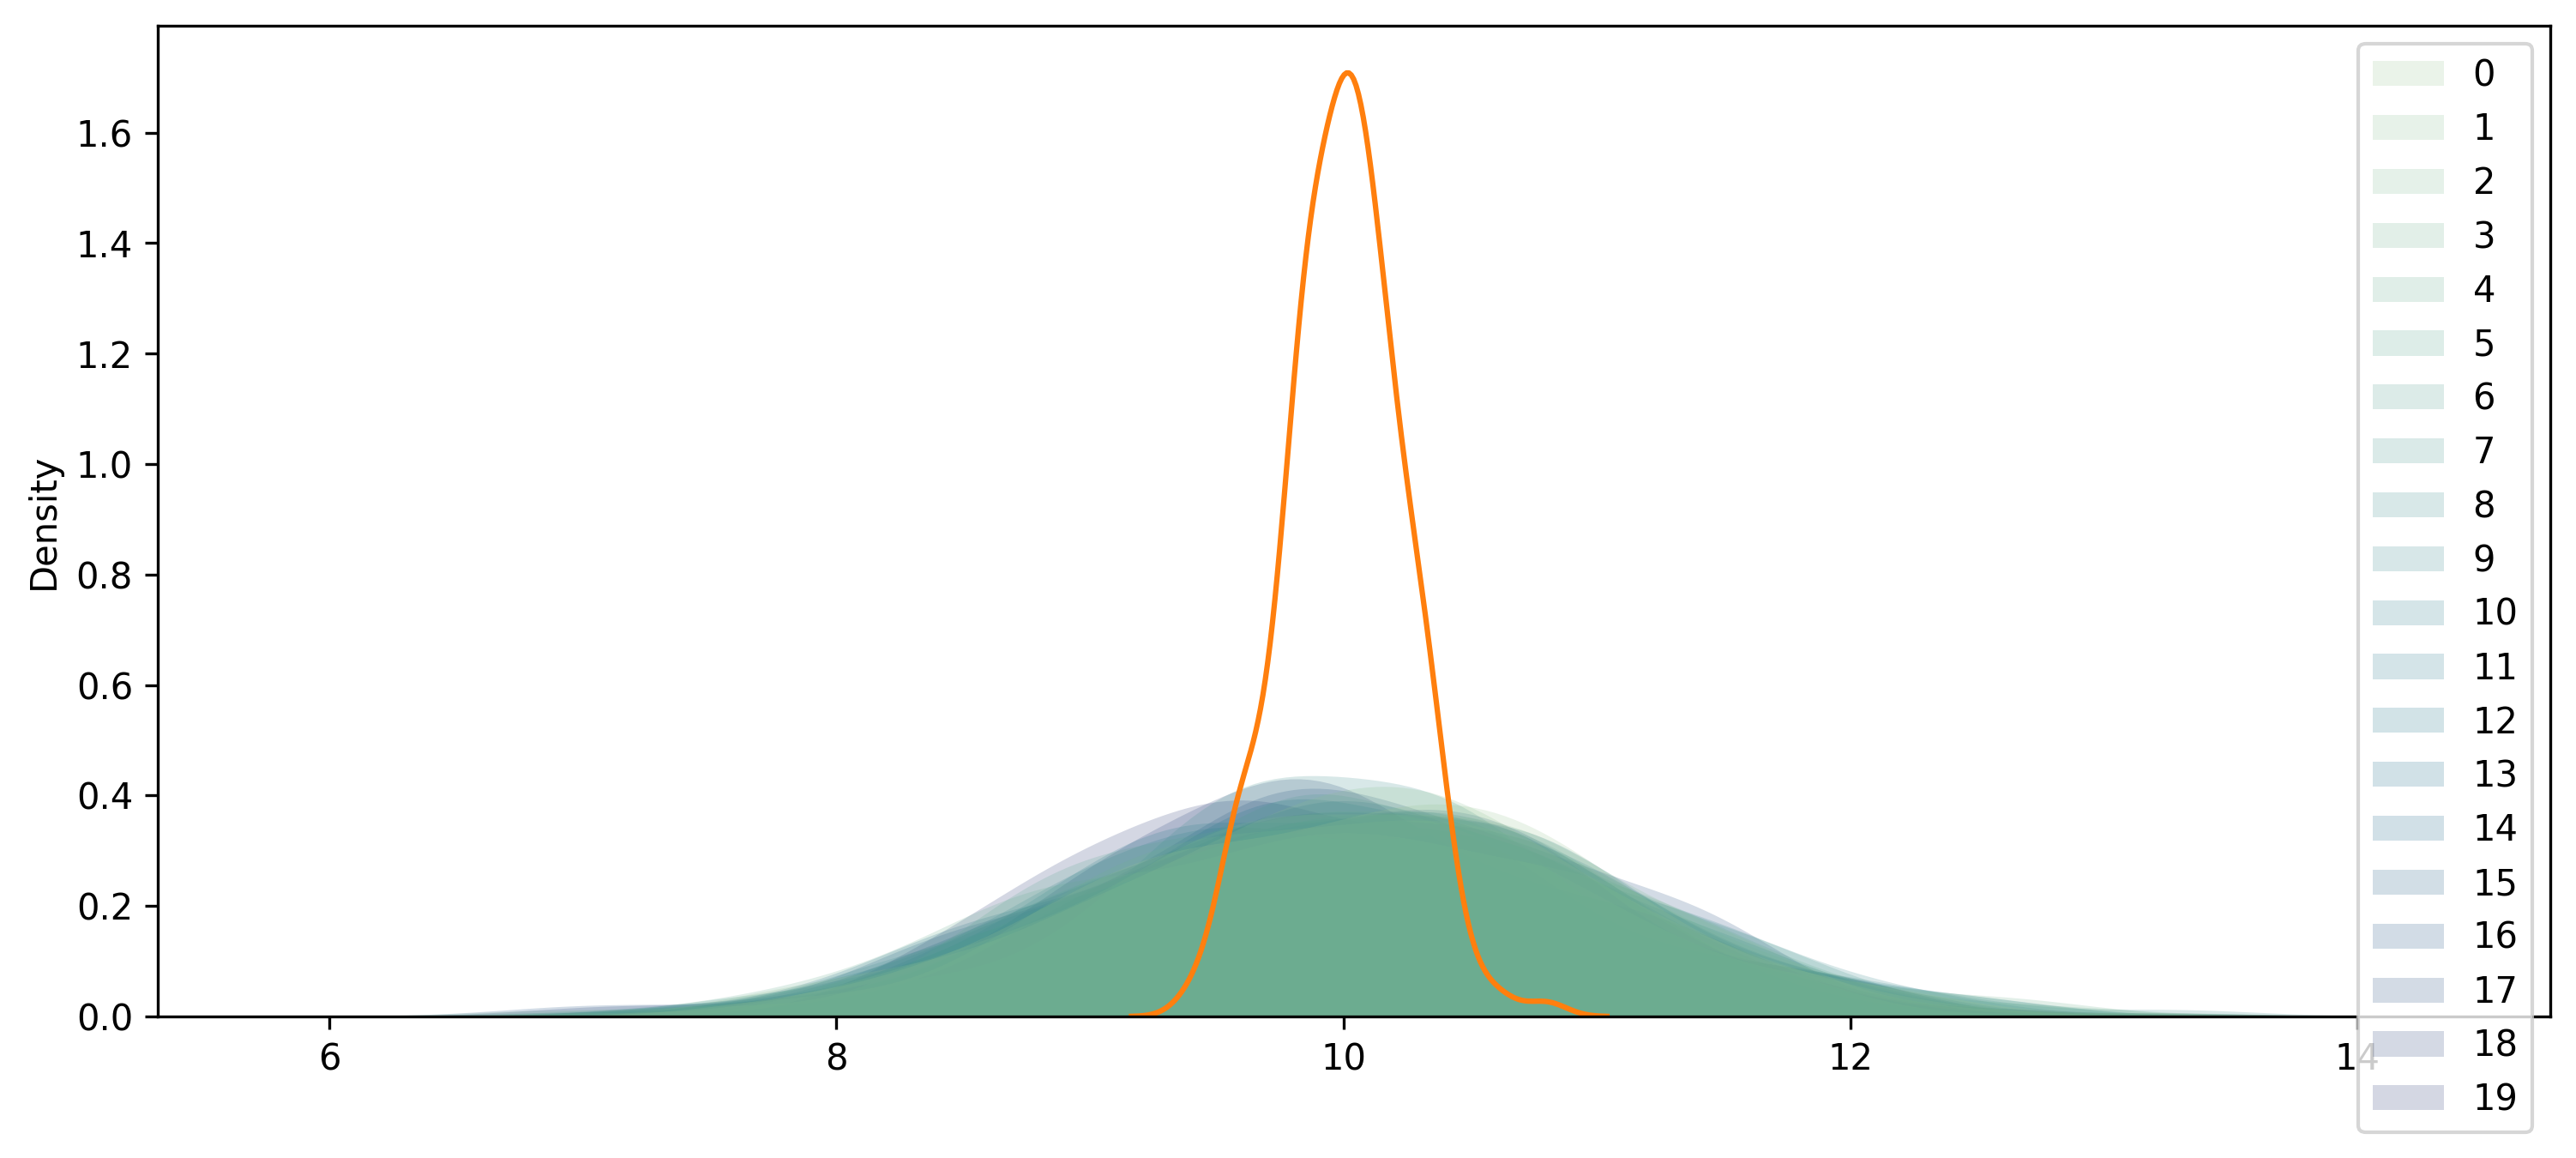

In [ ]:
plt.figure(figsize=(12,5))

# plt.scatter(medias,[-0.05]*amostras, color='C0',alpha=.1)

# sns.kdeplot(medias, color='C1')
# plt.hist(medias, color='C1',density=True,ec='black',alpha=0.5)

sns.kdeplot(data=K, fill=True, common_norm=False, palette="crest", alpha=.2, linewidth=0)
# sns.histplot(medias,kde=True,bins=10)
sns.kdeplot(medias, color='C1')

plt.show()